In [81]:
import ast
import matplotlib.pyplot as plt

# Load the results history
with open('Weather_forward.txt', 'r') as file:
    forward_hist_raw = [line.strip() for line in file]

# Convert string lines to actual Python tuples
forward_hist = [ast.literal_eval(line.replace("np.float64", "")) for line in forward_hist_raw]

# Load the results history
with open('Weather_backward.txt', 'r') as file:
    backward_hist1 = [line.strip() for line in file]

# Convert string lines to actual Python tuples
backward_hist = [ast.literal_eval(line.replace("np.float64", "")) for line in backward_hist1]

In [82]:
forward_hist[0] = (0, [], 0.425, 'No feature')
backward_hist[0] = (1, [1, 2, 3, 4, 5, 6], 0.424469696969697, 'All feature')
backward_hist[len(backward_hist)-1] = (7, [], 0.425, 'No feature')

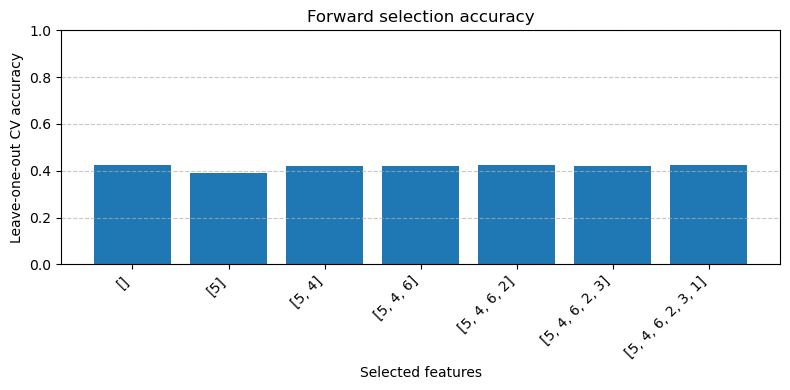

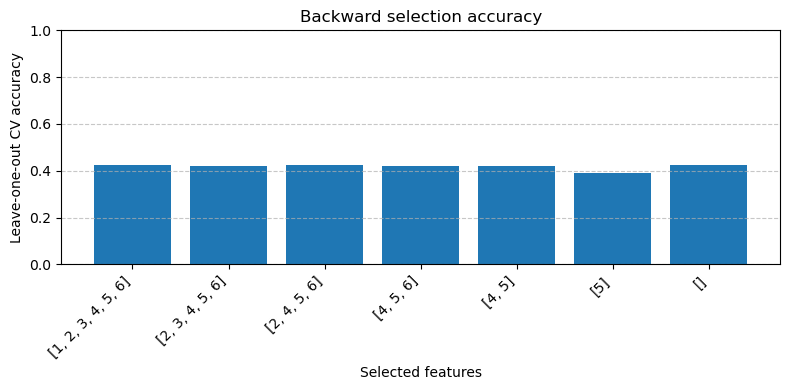

In [85]:
feature_sets = [str(features) for _, features, _, _ in forward_hist] #extract feature sets
accuracies = [acc for _, _, acc, _ in forward_hist] #extract accuracies

# Plot forward selection trace
plt.figure(figsize=(8, 4))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Forward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Plot backward elimination trace

feature_sets = [str(features) for _, features, _, _ in backward_hist]
accuracies = [acc for _, _, acc, _ in backward_hist]

plt.figure(figsize=(8, 4))
plt.bar(feature_sets, accuracies)

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.xlabel("Selected features")
plt.ylabel("Leave-one-out CV accuracy")
plt.title("Backward selection accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [86]:
df0 = pd.read_csv('weather_classification_data.csv')

df = np.array(df0)
season = df[:,7].copy() #season is the class label
temperature = df[:,0].copy()
df[:,7] = temperature
df[:,0] = season
data = df[:, [0,1,2,3,5,7,8]] #make season as the first column

# Encode season
for i in range(len(season)):
    if season[i] == 'Spring':
        data[i,0] = 1
    elif season[i] == 'Summer':
        data[i,0] = 2
    elif season[i] == 'Autumn':
        data[i,0] = 3
    elif season[i] == 'Winter':
        data[i,0] = 4

data = data.astype(float)

np.float64(-25.0)

In [92]:
df0 = pd.read_csv('weather_classification_data.csv')
df0

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
